In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim

# <font color = 'pickle'> **Exploding Gradients**

In [ ]:
#  h1  = xw1
#  h2 = h1w2
#  h2 = xw1w2

In [ ]:
W = torch.normal(0, 1, size=(4, 4))
print(f'Initial single matrix \n {W}')
for i in range(50):
    W = torch.mm(W, torch.normal(0, 1, size=(4, 4)))

print(f'\nAfter 50 matrix multiplications\n {W}')

for i in range(100):
    W = torch.mm(W, torch.normal(0, 1.5, size=(4, 4)))

print(f'\nAfter 150 matrix multiplications\n {W}')


Initial single matrix 
 tensor([[ 0.6452,  0.1082,  0.0712,  0.2036],
        [-0.5628,  0.8899, -1.1946,  0.0865],
        [ 0.9846,  1.5828,  1.8715, -2.2658],
        [-1.3645, -1.7172, -0.6109,  0.6357]])

After 50 matrix multiplications
 tensor([[ 1.7348e+12,  1.0342e+13, -1.0783e+13,  4.4440e+13],
        [ 8.5177e+10,  3.9551e+11, -3.5849e+11,  1.6658e+12],
        [-2.9336e+12, -1.7776e+13,  1.8673e+13, -7.6471e+13],
        [-1.6538e+12, -9.6459e+12,  9.9550e+12, -4.1384e+13]])

After 150 matrix multiplications
 tensor([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]])


# <font color = 'pickle'>**Sigmoid Activation Function**

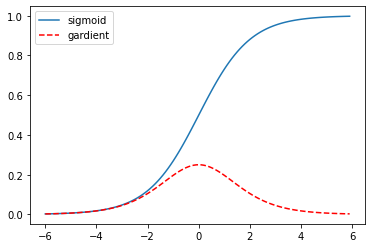

In [ ]:
x = torch.arange(-6.0, 6.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

plt.plot(x.detach().numpy(), y.detach().numpy(), label='sigmoid')
plt.plot(x.detach().numpy(), x.grad.numpy(),
         label='gardient', linestyle='dashed', color='r')
plt.legend()
plt.show()


# <font color = 'pickle'>**Vanishing Gradient Problem**

In [ ]:
W = torch.normal(0, 1, size=(4, 4))
print(f'Initial single matrix \n {W}')
for i in range(10):
    W = torch.mm(W, torch.normal(0, 1, size=(4, 4))*0.01)

print(f'\nAfter 10 matrix multiplications\n {W}')

for i in range(90):
    W = torch.mm(W, torch.normal(0, 1.5, size=(4, 4))*0.01)

print(f'\nAfter 100 matrix multiplications\n {W}')


Initial single matrix 
 tensor([[-0.4696, -0.3707, -0.9993, -1.7701],
        [-0.5704, -1.4447,  0.9240, -0.7866],
        [ 1.4343,  0.2829,  0.7414, -1.3565],
        [-0.1039,  0.6811,  1.4574, -1.0241]])

After 10 matrix multiplications
 tensor([[ 4.2029e-18, -1.1236e-18,  9.4408e-18, -1.2592e-18],
        [ 1.9286e-18, -3.1777e-19,  5.0078e-19, -3.8035e-19],
        [-3.2121e-19,  2.1836e-19, -3.4138e-18,  3.6348e-19],
        [-1.8571e-18,  6.8598e-19, -7.9427e-18,  8.5274e-19]])

After 100 matrix multiplications
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


# <font color = 'pickle'>**Understanding Variance**

In [ ]:
torch.manual_seed(0)
x = torch.randn(512)
w = torch.randn(512, 512)
x.mean(), x.std()

(tensor(0.0625), tensor(1.0160))

In [ ]:
# y = w1x1 + w2x2

<font color = 'indianred'>Variance of output depends on the input size of the weight matrix. The shape of the weight matrix is (output_size, input_size).

$Var(X + Y) ~ = ~ Var(X) + Var(Y) ~~~ \text{ if } X \text{ and } Y \text{ are independent}$

Output is weighted sum of inputs. Let us say we have N inputs. If we initialize weights with variance 1 then the output will have variance N.


In [ ]:
# assume Output size is same as input size
def var_output(input_size, output_size):
    mean, var = 0., 0.
    for i in range(1000):
        x = torch.randn(input_size)
        w = torch.randn(output_size, input_size)
        y = x@w.T  # b, input size input, output

        # y = w1xi + w2x2 ++= wmxn

        mean += y.mean().item()
        var += (y**2).mean().item()
    return mean/1000, var/1000


In [ ]:
var_output(300, 10)

(0.04992376188514754, 305.33573449325564)

In [ ]:
var_output(500, 10)


(-0.012989785647019744, 500.62665711212156)

In [ ]:
# Store mean and variance for various input sizes
torch.manual_seed(0)
var_ = []
mean_ = []
input_size = []
output_size = 10
for input in torch.arange(start=100, end=1000, step=50, dtype=int):
    input_size.append(input.item())
    m, v = var_output(input.item(), output_size)
    mean_.append(m)
    var_.append(v)

In [ ]:
pd.DataFrame({'input_size': input_size, 'var': var_, 'mean': mean_})

,input_size,var,mean
0,100,99.156086,0.013808
1,150,153.103809,-0.082100
2,200,199.883550,0.070397
3,250,251.298591,0.070737
4,300,300.093787,-0.117624
5,350,347.964815,0.077519
6,400,403.034577,-0.100612
7,450,449.359897,0.273781
8,500,487.205649,-0.180320
9,550,541.264791,0.424094


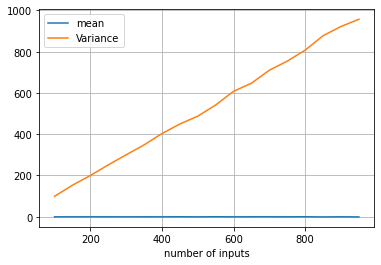

In [ ]:
plt.plot(input_size, mean_, label='mean')
plt.plot(input_size, var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()

# <font color = 'pickle'>**Change weight initialization**

In [ ]:
# assume Output size is same as input size
def var_output(input_size, output_size):
    mean, var = 0., 0.
    for i in range(1000):
        x = torch.randn(input_size)
        w = torch.randn(output_size, input_size)/math.sqrt(input_size)
        y = x @ w.T
        mean += y.mean().item()
        var += (y**2).mean().item()
    return mean/1000, var/1000

In [ ]:
import math
torch.manual_seed(0)
var_ = []
mean_ = []
input_size = []
output_size = 10
for input in torch.arange(start=100, end=1000, step=50, dtype=int):
    input_size.append(input.item())
    m, v = var_output(input.item(), output_size)
    mean_.append(m)
    var_.append(v)


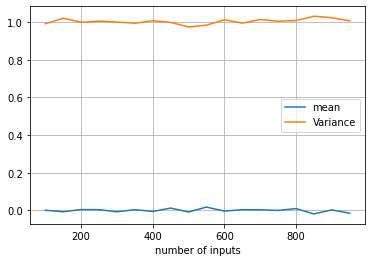

In [ ]:
plt.plot(input_size, mean_, label='mean')
plt.plot(input_size, var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()


# <font color = 'pickle'>**Initialization for ReLU activation function**

In [ ]:
# assume Output size is same as input size
def var_output(input_size, output_size):
    mean, var = 0., 0.
    for i in range(1000):
        x = torch.randn(input_size)
        w = torch.randn(output_size, input_size)
        y = F.relu(x@w.T)
        mean += y.mean().item()
        var += (y**2).mean().item()
    return mean/1000, var/1000

In [ ]:
torch.manual_seed(0)
var_ = []
mean_ = []
input_size = []
output_size = 10
for input in torch.arange(start=100, end=1000, step=50, dtype=int):
    input_size.append(input.item())
    m, v = var_output(input.item(), output_size)
    mean_.append(m)
    var_.append(v)


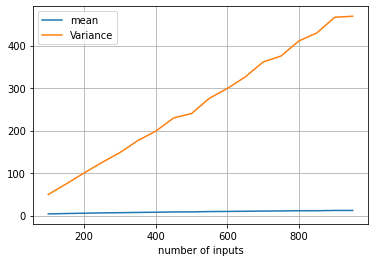

In [ ]:
plt.plot(input_size, mean_, label='mean')
plt.plot(input_size, var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# assume Output size is same as input size
def var_output(input_size, output_size):
    mean, var = 0., 0.
    for i in range(1000):
        x = torch.randn(input_size)
        w = torch.randn(output_size, input_size)/(math.sqrt(input_size/2))
        y = F.relu(w @ x)
        mean += y.mean().item()
        var += (y**2).mean().item()
    return mean/1000, var/1000


In [ ]:
torch.manual_seed(0)
var_ = []
mean_ = []
input_size = []
output_size = 10
for input in torch.arange(start=100, end=1000, step=50, dtype=int):
    input_size.append(input.item())
    m, v = var_output(input.item(), output_size)
    mean_.append(m)
    var_.append(v)


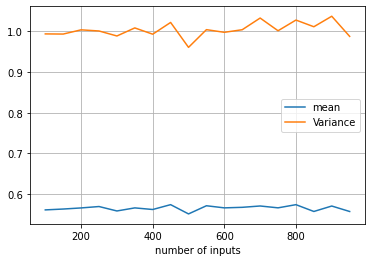

In [ ]:
plt.plot(input_size, mean_, label='mean')
plt.plot(input_size, var_, label='Variance')
plt.xlabel('number of inputs')
plt.grid(True)
plt.legend()
plt.show()


# <font color = 'pickle'>**Dead Neuron Problem- ReLU Activation**

In [ ]:
import torch.nn as nn
import torch

In [ ]:
torch.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # apply ReLU activation
        return x

# Define an input with one observation
input = torch.tensor([[-2.0]])

# Define the target output
target_output = torch.tensor([[1.0]])

# Create an instance of the network
net = Net()

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)


In [ ]:
net.state_dict()

OrderedDict([('fc1.weight', tensor([[0.7645]])),
             ('fc1.bias', tensor([0.8300]))])

In [ ]:
# Train the network for one epoch
for i in range(10):
    # Compute the output of the network
    output = net(input)

    # Compute the loss
    loss = loss_fn(output, target_output)

    # Zero the gradients
    optimizer.zero_grad()

    # Backpropagate the loss
    loss.backward()

    # Update the weights
    optimizer.step()


In [ ]:
net.state_dict()

OrderedDict([('fc1.weight', tensor([[0.7243]])),
             ('fc1.bias', tensor([0.8501]))])

# <font color = 'pickle'>**Leaky ReLU Activation Function**

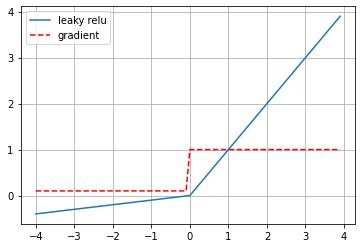

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.arange(-4.0, 4.0, 0.1, requires_grad=True)
y = F.leaky_relu(x, negative_slope=0.1)
y.backward(torch.ones_like(x))

plt.plot(x.detach().numpy(), y.detach().numpy(), label='leaky relu')
plt.plot(x.detach().numpy(), x.grad.numpy(),
         label='gradient', linestyle='dashed', color='r')
plt.legend()
plt.grid()
plt.show()
